<a href="https://colab.research.google.com/github/Coralain10/ML_Archaeological-Objects-Reconstruction/blob/main/data_display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Datos

In [1]:
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Recopilación

In [2]:
!wget -P /content/Data https://github.com/renato145/3D-ORGAN/blob/master/datasets/arq_dataset.tar.gz?raw=true

--2022-10-17 23:16:25--  https://github.com/renato145/3D-ORGAN/blob/master/datasets/arq_dataset.tar.gz?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/renato145/3D-ORGAN/raw/master/datasets/arq_dataset.tar.gz [following]
--2022-10-17 23:16:25--  https://github.com/renato145/3D-ORGAN/raw/master/datasets/arq_dataset.tar.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/renato145/3D-ORGAN/master/datasets/arq_dataset.tar.gz [following]
--2022-10-17 23:16:25--  https://raw.githubusercontent.com/renato145/3D-ORGAN/master/datasets/arq_dataset.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199

In [3]:
folder = "/content/Data/"
file_tar = folder + "arq_dataset.tar.gz?raw=true"
file_name = "custom_arq_dataset.npy"

In [4]:
file = tarfile.open(file_tar)
file.extract(file_name, folder)
file.close()

In [5]:
data = np.load(folder+file_name, allow_pickle=True)
data = data.reshape(1)

In [6]:
#data

## A dataframe

In [7]:
train = data[0]["train"] #'labels' 'data'
train = [train["labels"],train["data"]]
#train
#train[0][-1], train[1][0]

In [8]:
df = pd.DataFrame(train)
df = df.T
df.columns = ['labels','data']
df

,labels,data
0,bathtub,"[[[False, False, False, False, False, False, F..."
1,bathtub,"[[[False, False, False, False, False, False, F..."
2,bathtub,"[[[False, False, False, False, False, False, F..."
3,bathtub,"[[[False, False, False, False, False, False, F..."
4,bathtub,"[[[False, False, False, False, False, False, F..."
...,...,...
4918,arq,"[[[False, False, False, False, False, False, F..."
4919,arq,"[[[False, False, False, False, False, False, F..."
4920,arq,"[[[False, False, False, False, False, False, F..."
4921,arq,"[[[False, False, False, False, False, False, F..."


# Visualización

## Selección de tipo de objeto

In [9]:
tipos = df['labels'].unique()
tipos

array(['bathtub', 'dresser', 'chair', 'night_stand', 'toilet', 'monitor',
       'table', 'bed', 'sofa', 'desk', 'arq'], dtype=object)

In [10]:
tipo = "chair"  #@param ['bathtub', 'dresser', 'chair', 'night_stand', 'toilet', 'monitor', 'table', 'bed', 'sofa', 'desk', 'arq']
data_tipo = df[ df['labels']==tipo ]
data_tipo

,labels,data
306,chair,"[[[False, False, False, False, False, False, F..."
307,chair,"[[[False, False, False, False, False, False, F..."
308,chair,"[[[False, False, False, False, False, False, F..."
309,chair,"[[[False, False, False, False, False, False, F..."
310,chair,"[[[False, False, False, False, False, False, F..."
...,...,...
1190,chair,"[[[False, False, False, False, False, False, F..."
1191,chair,"[[[False, False, False, False, False, False, F..."
1192,chair,"[[[False, False, False, False, False, False, F..."
1193,chair,"[[[False, False, False, False, False, False, F..."


In [11]:
def bbvox_points(obj):
  points = []
  for z in range(32):
    for y in range(32):
      for x in range(32):
        if obj[z,x,y]:
          points += [ (x,y,z) ]
  return np.array(points)

In [12]:
def show3D(points):
  plt.subplots(figsize=(12,12))
  ax = plt.subplot( projection='3d' )
  ax.scatter3D(points[:,0], points[:,1], points[:,2],c='black')

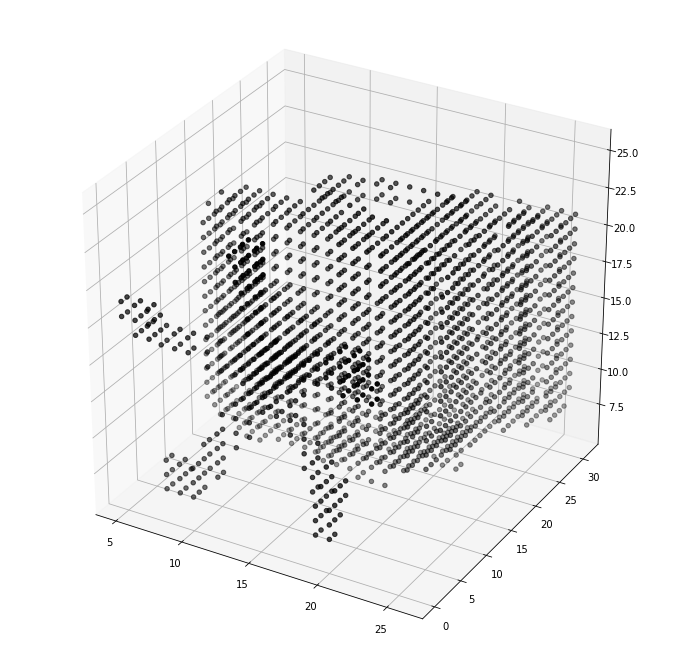

In [14]:
id = 85 #@param {type: 'slider', max:888, min:0, step:1}
show3D( bbvox_points(data_tipo.iloc[id][1]) )